In [1]:
!wget https://3.bp.blogspot.com/-DA8qNzJ8fP4/VwY04YVsWtI/AAAAAAAAAsI/Mh5owb35KM4JulK0UYZikZjpwT4dgfGSA/s1600/DSC_8906.JPG -O mangga1.jpg

--2019-06-28 06:33:45--  https://3.bp.blogspot.com/-DA8qNzJ8fP4/VwY04YVsWtI/AAAAAAAAAsI/Mh5owb35KM4JulK0UYZikZjpwT4dgfGSA/s1600/DSC_8906.JPG
Resolving 3.bp.blogspot.com (3.bp.blogspot.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to 3.bp.blogspot.com (3.bp.blogspot.com)|173.194.79.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227548 (222K) [image/jpeg]
Saving to: ‘mangga1.jpg’

mangga1.jpg         100%[===================>] 222.21K  --.-KB/s    in 0.002s  

2019-06-28 06:33:45 (104 MB/s) - ‘mangga1.jpg’ saved [227548/227548]



In [0]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# dimensions of our images
img_width, img_height = 128, 128

# load the model we saved
model = load_model('shallownet_weights_mangga.hdf5')


In [0]:
classLabels = ["apoderus_javanicus", "aulacaspis_tubercularis", "ceroplastes_rubens", "cisaberoptus_kenyae", 
                                          "dappula_tertia", "dialeuropora_decempuncta", "erosomyia_sp", "icerya_seychellarum", 
                                          "ischnaspis_longirostris", "mictis_longicornis", "neomelicharia_sparsa", "normal", "orthaga_euadrusalis", 
                                          "procontarinia_matteiana", "procontarinia_rubus", "valanga_nigricornis"]

In [0]:
dim = (500,500)

In [0]:
panda = cv2.imread('mangga1.jpg')
panda = cv2.resize(panda, dim)

dialeuropora_decempuncta
0.3832898


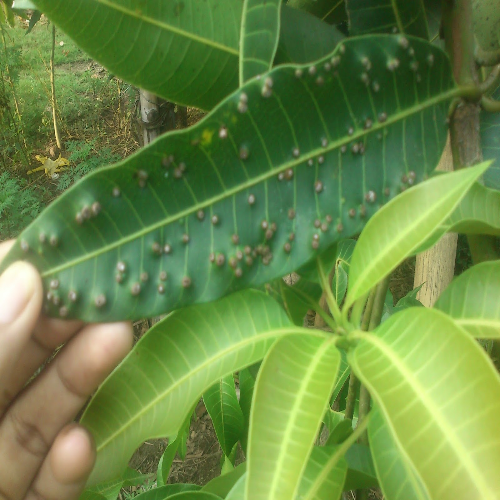

In [21]:
# predicting images
img = image.load_img('mangga1.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
images = images.astype(np.float) / 255

classes = model.predict_classes(images, batch_size=1)
prob = model.predict(images, batch_size=1)
print(classLabels[classes[0]])
print(prob[0][classes[0]])
cv2_imshow(panda)